In [1]:
import numpy as np
from pymcaspec import specfile
from pymcaspec.utils import (calculate_energy_per_pixel, bin_RIXS, bin_mythen,
                             clean_mythen_data,construct_E_M, get_merixE)
import matplotlib.pyplot as plt
import matplotlib as mpl

%matplotlib inline

# All parameters here 
Unless otherwise specified Energy in keV distance in mm

In [2]:
# Analyzer related
a = 5.4309 # lattice constant Si in Ang
d = a/np.sqrt(1**2 + 1**2 + 7**2) # d spacing in Ang

analyzer_info = dict(d=d,  # d spacing in Ang
                     R=1000, # analyzer radius in mm
                     energy_edge=8.333 # resonant energy in keV # 8.3328 online?
                     )

magicchannel = 1050 #+ 0.5 # should be in 1-1280 indexing
min_chan = magicchannel - 29 -1e6
max_chan = magicchannel + 30 +1e6
threshold = np.inf # throw away values above this

monitor = 'i2' # name of monitor to use

# Energy per channel

In [3]:
energy_per_pixel = calculate_energy_per_pixel(**analyzer_info)

# Make fake data

In [4]:
central_Es = np.array([8.334, 8.334045, 8.334091, 8.334136, 8.334182, 8.334227,
                    8.334273, 8.334318, 8.334364, 8.334409, 8.334455, 8.3345  ,
                    8.334545, 8.334591, 8.334636, 8.334682, 8.334727, 8.334773,
                    8.334818, 8.334864, 8.334909, 8.334955, 8.335   , 8.335045,
                    8.335091, 8.335136, 8.335182, 8.335227, 8.335273, 8.335318,
                    8.335364, 8.335409, 8.335455, 8.3355  , 8.335545, 8.335591,
                    8.335636, 8.335682, 8.335727, 8.335773, 8.335818, 8.335864,
                    8.335909, 8.335955, 8.336   ])

central_Ms = np.zeros_like(central_Es)

def gauss(E, E0, sigma):
    prefac = 1/(sigma*np.sqrt(2*np.pi))
    y = prefac * np.exp(-0.5*((E - E0)/sigma)**2 )
    return y

mythen_dataset = np.zeros((len(central_Es), 1280))

refE = 8.33500
sigma = 10e-5
indices = np.arange(1, 1280+1)

for i, central_E in enumerate(central_Es):
    energies = (magicchannel-indices)*energy_per_pixel + central_E
    y = gauss(energies, refE, sigma)/len(central_Es)
    y[indices<min_chan]  = 0
    y[indices>max_chan]  = 0
    mythen_dataset[i, :] = y

# Simple test witih ones assigned to the central energy
# mythen_dataset = np.zeros((len(central_Es), 1280))
# for i, central_E in enumerate(central_Es):
#     ind = int(magicchannel-(refE-central_E)/energy_per_pixel)
#     print(ind)
#     mythen_dataset[i, ind] = 1

# Bin data

In [5]:
E, I, M, N = bin_RIXS(central_Es, central_Ms, mythen_dataset,
                      magicchannel, energy_per_pixel)

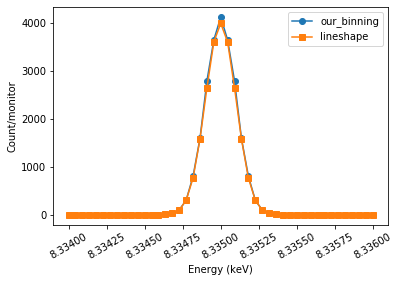

In [6]:
fig, ax = plt.subplots()

ax.plot(E, I, 'o-', label='our_binning')
ax.plot(E, gauss(E, refE, sigma), 's-', label='lineshape')

#ax.plot(S_processed[0], S_processed['C'], 'x-', label='processed')

ax.legend()
ax.set_xlabel('Energy (keV)')
ax.set_ylabel('Count/monitor')
ax.xaxis.set_tick_params(rotation=30)